In [1]:
%load_ext google.cloud.bigquery
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [2]:
sql = '''
SELECT *  FROM `eth-tokens.alldata.clean` LIMIT 1000
'''

df = client.query(sql).to_dataframe()
df.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,active_months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent
0,0x221d605c7fc6aee622d72118342c85e141f01f4c,2,2,5.80426753,2.902133765,1241.627051,620.813526,5.80538053,2.902690265,1241.864626,620.932313,1,2.0,2.0,5.80426753,1241.627051,5.80538053,1241.864626,0,0
1,0xc025fadbe3c786a3a7b674b98a0b11abeb0d90fc,2,2,0.001655,0.0008275,0.348102,0.174051,0.002655,0.0013275,0.561002,0.280501,1,2.0,2.0,0.001655,0.348102,0.002655,0.561002,0,0
2,0xc01f8c04894a83dc7f9bc96ff78c446526328f40,2,3,0.73,0.365,146.744600,73.372300,0.9838378,0.327945933,199.831880,66.610627,1,2.0,3.0,0.73,146.744600,0.9838378,199.831880,0,0
3,0x890a64aa38f3ae0ca4a27875198cddb584f65dc9,2,3,0.00516286,0.00258143,1.041666,0.520833,0.03006893,0.010022977,5.997849,1.999283,1,2.0,3.0,0.00516286,1.041666,0.03006893,5.997849,0,0
4,0x4c1efa9a335d4d0acb4a0ad68394fe0d82dace02,2,2,66.027231604,33.013615802,13845.910467,6922.955234,66.02966767,33.014833835,13846.421310,6923.210655,1,2.0,2.0,66.027231604,13845.910467,66.02966767,13846.421310,0,0


In [3]:
data = df.iloc[:,1:]


In [4]:
cl = cluster.KMeans(4)

fit_cl = cl.fit(data)

centroids = fit_cl.cluster_centers_

In [5]:
pd.DataFrame(centroids, columns=data.columns)

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,active_months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent
0,10.361570,22.392562,161.059923,52.558255,7.746708e+03,1357.820364,174.954748,54.047638,8.178930e+03,1285.391505,19.044421,1.158233,1.808766,10.081004,1319.870253,10.947566,1424.309850,0.133264,7.851240e-01
1,121.500000,160.000000,9569.473185,87.803106,2.666855e+06,22965.568096,10659.514167,164.827407,3.093587e+06,37136.460597,13.000000,28.208333,17.437500,3671.399741,782072.632722,3717.180382,800376.711789,0.000000,0.000000e+00
2,82.333333,96.333333,2730.703323,281.996363,1.151438e+06,73786.656378,3758.957246,302.189377,1.371903e+06,70941.992260,8.666667,6.444444,9.039683,1145.302104,301126.820887,2148.409251,513594.185328,0.000000,-1.110223e-16
3,46.037037,39.888889,2574.344108,375.711012,3.801869e+05,57906.262745,2497.970805,486.071373,3.512081e+05,64693.819641,15.814815,11.324100,5.864183,233.346867,45676.311148,191.710082,36196.855149,0.000000,-2.220446e-16


In [6]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=5))])

In [7]:
results = pipe.fit_transform(data)

In [8]:
pca = pipe.named_steps['PCA']

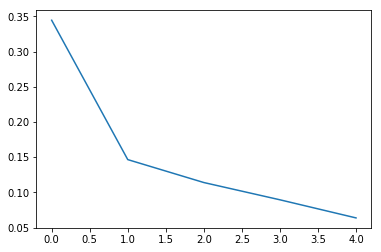

In [9]:
plt.plot(np.arange(pca.n_components_), pca.explained_variance_ratio_)

In [10]:
results.shape

(1000, 5)

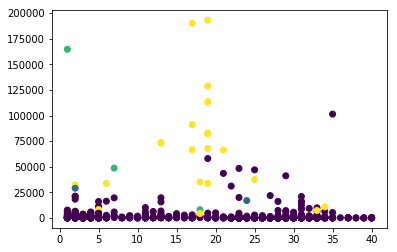

In [11]:
plt.scatter(data.active_months, data.avg_usd_sent, c=cl.labels_)

In [12]:
cl = cluster.KMeans().fit(results)

(-50, 150)

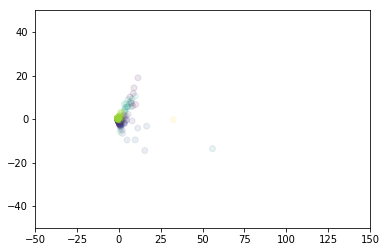

In [13]:
plt.scatter(results[:,0],results[:,1],c=cl.labels_, alpha=.1)
plt.ylim(-50,50)
plt.xlim(-50,150)

In [14]:
silhouette_score(results, cl.labels_ )

0.5093503844786752

For n_clusters = 4 The average silhouette_score is : 0.8523845351991673


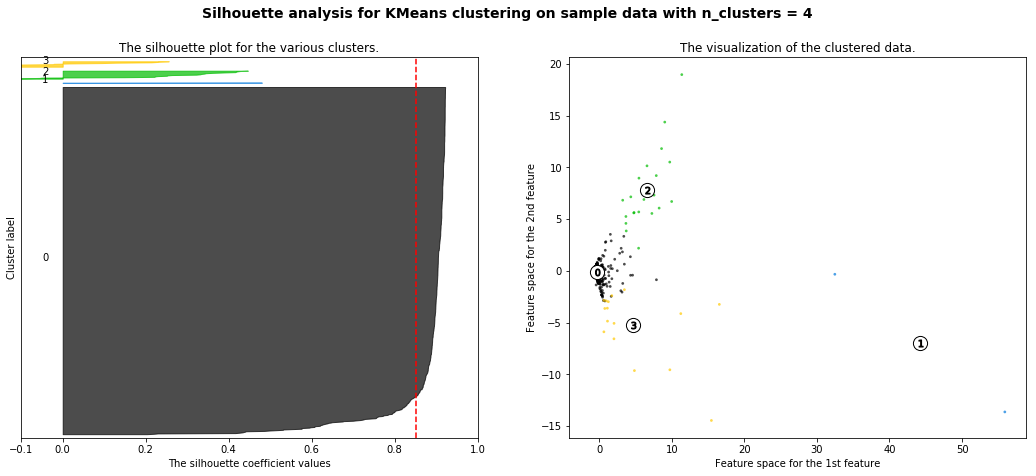

In [15]:

X=results





range_n_clusters = [4]

for n_clusters in range_n_clusters:
#     X=data
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #subset data so I don't kill computer
#     X=data[:100]
#     cluster_labels[:100]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [16]:
%run kmedians.py

<Figure size 432x288 with 0 Axes>

In [17]:
k = 8

#length of data
datapoints = len(results)
indices = [random.randint(0,datapoints-1) for i in range(k+1)]
initial_centers = results[indices]

km =  kmedians(results, initial_centers, ccore=False)



In [18]:
km.process()
clusters = km.get_clusters()

In [19]:
clusters = np.array([np.array(x) for x in clusters])

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [33]:
%matplotlib widget
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    ax.scatter(results[clusters[i]][:,0],
               results[clusters[i]][:,1],
               results[clusters[i]][:,2], alpha=.5)

# ax.set_xlim(-.1,-.05)
# ax.set_ylim(-.3,.3)
# ax.set_zlim(-50,25)

FigureCanvasNbAgg()

In [22]:
pca.components_.shape

(5, 19)

In [23]:
unitvectors = np.diagflat(np.ones(19))

In [24]:
trans = pca.transform(unitvectors)

In [25]:
pts = []
for i in range(19):
    pts.append(trans[i][:4])
pts = np.array(pts)

In [26]:
names = data.columns.values

In [31]:
%matplotlib widget
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for i, pt in enumerate(pts):
    lbl = names[i]
    if 'total_usd' in lbl:
        color='green'
    elif 'total_eth' in lbl:
        color='blue'
    elif 'avg' in lbl:
        color='black'
    elif 'outgoing' in lbl:
        color='magenta'
    elif 'incoming' in lbl:
        color='orange'
    elif 'monthly_eth' in lbl:
        color='purple'
    elif 'monthly_usd' in lbl:
        color='yellow'
    elif 'active_months' in lbl:
        color='cyan'
    else:
        color='pink'
        
    ax.plot([0,pt[0]], [0,pt[1]], [0,pt[2]], label= lbl, c=color )
ax.legend()


FigureCanvasNbAgg()